In [2]:
import numpy as np
import pandas as pd
import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf

In [3]:
from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

seguihis = 'C:\\WINDOWS\\Fonts\\seguihis.ttf'
prop_seguihis = mfm.FontProperties(fname=seguihis)

seguisym = 'C:\\WINDOWS\\Fonts\\seguisym.ttf'
prop_seguisym = mfm.FontProperties(fname=seguisym)

# Find the Segoe font that can plot symbols used in map
# Code from the tutorial at this link:
# https://jdhao.github.io/2018/04/08/matplotlib-unicode-character/

from fontTools.ttLib import TTFont
import matplotlib.font_manager as mfm

def char_in_font(Unicode_char, font):
    for cmap in font['cmap'].tables:
        if cmap.isUnicode():
            if ord(Unicode_char) in cmap.cmap:
                return True
    return False

uni_chars = [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb", 
             u"\u2724", u"\u25c8", u"\u2388", u"\u214f"]

font_info = [(f.fname, f.name) for f in mfm.fontManager.ttflist]

for uni_char in uni_chars:
    for i, font in enumerate(font_info):
        if char_in_font(uni_char, TTFont(font[0], fontNumber=0)):
            if font[1].split()[0] == "Segoe":
                print(uni_char, ":", font[0], font[1])
                break
                
seguihis = 'C:\WINDOWS\Fonts\seguihis.ttf'
prop_seguihis = mfm.FontProperties(fname=seguihis)

seguisym = 'C:\WINDOWS\Fonts\seguisym.ttf'
prop_seguisym = mfm.FontProperties(fname=seguisym)

In [4]:
def set_save_image(fig, savename, dpi=1200):
    # Output text as editable PDF text objects instead of shapes
    matplotlib.rcParams['pdf.fonttype'] = 42
    
    # Force PDF to respect zorder by supressing image compositing
    matplotlib.rcParams['image.composite_image'] = False

    # Remove borders on the plot axes
    for ax in fig.get_axes():
       ax.spines['bottom'].set_visible(False)
       ax.spines['left'].set_visible(False)
       ax.spines['top'].set_visible(False)
       ax.spines['right'].set_visible(False)
       ax.axis('off')
       ax.set_global()
       # print(ax.get_xlim())
       ax.set_xlim([-14000000,14000000])
       ax.set_ylim([-14000000,14000000])
       try:

           ax.outline_patch.set_edgecolor('none')
           ax.background_patch.set_fill(False)
       except:
           pass 
        
    # Remove all padding and margins
    plt.tight_layout()
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0,0)
    plt.gca().xaxis.set_major_locator(matplotlib.pyplot.NullLocator())
    plt.gca().yaxis.set_major_locator(matplotlib.pyplot.NullLocator())
        
    if savename.split('.')[-1] == 'pdf':
        pp = pdf.PdfPages(savename, keep_empty=False)
        pp.savefig(fig)
        pp.close()
    elif savename.split('.')[-1] == 'png':
        plt.savefig(savename, format='png', dpi=dpi, pad_inches=0, transparent=True)
    else:
        print("Unrecognized file format, plot not saved!")

    plt.show()
    plt.clf()
    plt.close('all')

In [5]:
stars = pd.read_csv('./data/processed/hygdata_processed_mag65.csv')
asterisms = pd.read_csv('./data/processed/asterisms.csv')
constellations = pd.read_csv('./data/processed/constellations.csv')
const_names = pd.read_csv('./data/processed/centered_constellations.csv', encoding="latin-1")
messiers = pd.read_csv('./data/processed/messier_ngc_processed.csv')
display(messiers.head())

magnitude_cutoff = 5.5

stars = stars.loc[stars["mag"] < magnitude_cutoff]

print(len(stars), 'stars to plot')
print(len(asterisms), 'asterisms to plot')
# print(len(constellations), 'constellations to plot')
print(len(const_names), 'constellation names to plot')
print(len(messiers), 'messier objects to plot')
print(len(messiers[pd.notnull(messiers['proper_name'])]), 'named messiers to plot')





figsize = (10, 10)
const_color = '#ff2620'
zodiac_color = '#fcb322'
nonzodiac_color = '#77a9da'
other_color = '#979330'

class LowerThresholdPlateCarree(ccrs.PlateCarree):
    ''' Add a new class to increase resolution of Geodetic vectors '''
    @property
    def threshold(self):
        return 0.01
    @threshold.setter
    def threshold(self, new_threshold):
        return 0.01

name                           type         ra        dec  magnitude  \
0  M11                   open cluster  18.851667  -6.266667        5.8   
1  M13               globular cluster  16.695000  36.466667        5.8   
2  M15               globular cluster  21.500000  12.166667        6.2   
3  M16                   open cluster  18.313333 -13.783333        6.0   
4  M17  emission nebula, open cluster  18.346667 -16.183333        6.0   

         proper_name ra_original dec_original code             name_2  
0  Wild Duck Cluster   18h 51.1m      -6d 16'    ᚸ  Wild Duck Cluster  
1   Hercules Cluster   16h 41.7m     +36d 28'    ✤   Hercules Cluster  
2                NaN     21h 30m     +12d 10'    ✤                M15  
3       Eagle Nebula   18h 18.8m     -13d 47'    ᚸ       Eagle Nebula  
4        Swan Nebula   18h 20.8m     -16d 11'    ◈        Swan Nebula

2833 stars to plot
88 asterisms to plot
88 constellation names to plot
66 messier objects to plot
16 named messiers to plot


In [6]:
# kick all stars not in the northern hemisphere

stars_northern = stars.loc[stars["dec"] >= -10]
print(len(stars_northern), 'stars to plot')




1553 stars to plot


fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

for index, row in constellations.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=1, color=const_color)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/constellations.pdf')

In [7]:
# plot the sun position
sun_positions = pd.read_csv('./data/sun_positions.csv')

display(sun_positions.head())

for index, row in sun_positions.iterrows():
    # *(-1)-180 flips the data
    ra = row['ra']
    dec = row['dec']

    print(str(ra) + ", " + str(dec))
    


date        ra      dec
0  15.01.2000  296.5170 -21.2046
1  15.02.2000  328.3130 -12.8314
2  15.03.2000  355.5660  -1.9221
3  15.04.2000   23.8608   9.9444
4  15.05.2000   52.5192  18.9824

296.517, -21.2046
328.313, -12.8314
355.566, -1.9221
23.8608, 9.9444
52.5192, 18.9824
84.1183, 23.3257
115.055, 21.4395
145.217, 13.8891
173.445, 2.8311
200.668, -8.7022
230.997, -18.6213
263.227, -23.2916


In [18]:
from enum import Enum

class Colors(Enum):

    SPACE ='#030307'
    C1='#FF3007'
    C2='#1475FF'

    '''
    SPACE = '#030040'
    STARS_BASE = "#FFCC64"
    S1 = "#3E2F5E"
    S2 = "#81506A"
    S3 = "#A96A66"
    S4 = "#D2865B"
    S5 = "#E7B77F"
    S6 = "#FFF5CC"
    GRID = "#161173"
    STARS_BAYERS = "#9185FF"
    TEXT_BASE = "#352EB4"
    TEXT_ASTERISMS = "#FFF5CC"
    ASTERISMS = "#A96A66"
    LIMITS = "#352EB4"
    STARS_CONTOUR = "#010022"
    ECLIPTIC = "#161173"
    '''

In [23]:
# create custom star markers

from svgpath2mpl import parse_path

#5.5 - 4.5 
stars_s1 = parse_path("""M1032.14,541.984C1069.92,541.984 1100.6,572.66 1100.6,610.443C1100.6,648.226 1069.92,678.901 1032.14,678.901C994.354,678.901 963.678,648.226 963.678,610.443C963.678,572.66 994.563,541.984 1032.14,541.984Z""")
stars_s1.vertices -= stars_s1.vertices.mean(axis=0)
print(type(stars_s1))

#4.5 - 3.5
stars_s2 = parse_path("""M1032.14,541.984C1069.92,541.984 1100.6,572.66 1100.6,610.443C1100.6,648.226 1069.92,678.901 1032.14,678.901C994.354,678.901 963.678,648.226 963.678,610.443C963.678,572.66 994.453,541.984 1032.14,541.984Z""")
stars_s2.vertices -= stars_s2.vertices.mean(axis=0)

#3.5 - 2.5
stars_s3 = parse_path("""M526.608,136.566L549.633,177.703C550.23,178.769 550.972,179.749 551.836,180.613C552.7,181.477 553.68,182.218 554.746,182.815L595.883,205.84L554.746,228.865C553.68,229.462 552.7,230.204 551.836,231.068C550.972,231.932 550.23,232.912 549.633,233.978L526.608,275.115L503.583,233.978C502.986,232.912 502.245,231.932 501.381,231.068C500.517,230.204 499.537,229.462 498.471,228.865L457.334,205.84L498.471,182.815C499.537,182.218 500.517,181.477 501.381,180.613C502.245,179.749 502.986,178.769 503.583,177.703L526.608,136.566Z""")
stars_s3.vertices -= stars_s3.vertices.mean(axis=0)

#2.5 - 1.5
stars_s4 = parse_path("""M526.608,136.566L540.572,168.737C542.044,172.129 544.398,175.064 547.39,177.238C550.381,179.411 553.9,180.743 557.581,181.095L592.493,184.433L566.211,207.655C563.44,210.103 561.376,213.249 560.233,216.766C559.09,220.282 558.911,224.041 559.714,227.65L567.327,261.885L537.121,244.065C533.936,242.186 530.306,241.195 526.608,241.195C522.911,241.195 519.281,242.186 516.096,244.065L485.89,261.885L493.503,227.65C494.306,224.041 494.126,220.282 492.984,216.766C491.841,213.249 489.777,210.103 487.006,207.655L460.724,184.433L495.636,181.095C499.317,180.743 502.836,179.411 505.827,177.238C508.819,175.064 511.173,172.129 512.645,168.737L526.608,136.566Z""")
stars_s4.vertices -= stars_s4.vertices.mean(axis=0)

#1.5 - 0.5
stars_s5 = parse_path("""M526.608,136.566L531.27,162.489C532.473,169.18 536.563,175.001 542.451,178.4C548.339,181.799 555.425,182.431 561.821,180.128L586.602,171.203L566.483,188.201C561.29,192.589 558.294,199.042 558.294,205.84C558.294,212.639 561.29,219.092 566.483,223.479L586.602,240.478L561.821,231.553C555.425,229.249 548.339,229.881 542.451,233.281C536.563,236.68 532.473,242.501 531.27,249.192L526.608,275.115L521.947,249.192C520.744,242.501 516.653,236.68 510.766,233.281C504.878,229.881 497.792,229.249 491.396,231.553L466.615,240.478L486.734,223.479C491.927,219.092 494.923,212.639 494.923,205.84C494.923,199.042 491.927,192.589 486.734,188.201L466.615,171.203L491.396,180.128C497.792,182.431 504.878,181.799 510.766,178.4C516.653,175.001 520.744,169.18 521.947,162.489L526.608,136.566Z""")
stars_s5.vertices -= stars_s5.vertices.mean(axis=0)

#0.5 and below
stars_s6 = parse_path("""M526.608,136.566L528.853,156.562C529.631,163.499 534.119,169.465 540.569,172.137C547.019,174.808 554.411,173.763 559.867,169.408L575.593,156.856L563.041,172.582C558.686,178.038 557.64,185.43 560.312,191.88C562.984,198.33 568.95,202.818 575.887,203.596L595.883,205.84L575.887,208.085C568.95,208.863 562.984,213.351 560.312,219.801C557.64,226.251 558.686,233.643 563.041,239.099L575.593,254.825L559.867,242.273C554.411,237.918 547.019,236.872 540.569,239.544C534.119,242.216 529.631,248.182 528.853,255.119L526.608,275.115L524.364,255.119C523.586,248.182 519.098,242.216 512.648,239.544C506.198,236.872 498.806,237.918 493.35,242.273L477.624,254.825L490.176,239.099C494.531,233.643 495.576,226.251 492.905,219.801C490.233,213.351 484.267,208.863 477.33,208.085L457.334,205.84L477.33,203.596C484.267,202.818 490.233,198.33 492.905,191.88C495.576,185.43 494.531,178.038 490.176,172.582L477.624,156.856L493.35,169.408C498.806,173.763 506.198,174.808 512.648,172.137C519.098,169.465 523.586,163.499 524.364,156.562L526.608,136.566Z""")
stars_s6.vertices -= stars_s6.vertices.mean(axis=0)

def get_star_color(mag: float):
    '''
    if mag < 0.5:
        return Colors.S6.value
    elif mag < 1.5:
        return Colors.S5.value
    elif mag < 2.5:
        return Colors.S4.value
    elif mag < 3.5:
        return Colors.S3.value
    elif mag < 4.5:
        return Colors.S2.value
    elif mag < 5.5:
        return Colors.S1.value
    '''

    return Colors.C2.value

def get_star_marker(mag: float):
    if mag < 0.5:
        return stars_s6
    elif mag < 1.5:
        return stars_s5
    elif mag < 2.5:
        return stars_s4
    elif mag < 3.5:
        return stars_s3
    elif mag < 4.5:
        return stars_s2
    elif mag < 5.5:
        return stars_s1

size_factor = 10

def get_star_size(mag: float):
 
    size_bonus = 6.5 - mag

    if mag < 0.5:
        return (16 + size_bonus) * size_factor
    elif mag < 1.5:
        return (11 + size_bonus)* size_factor
    elif mag < 2.5:
        return (8 + size_bonus)* size_factor
    elif mag < 3.5:
        return (5 + size_bonus)* size_factor
    elif mag < 4.5:
        return (1.4 + size_bonus)* size_factor
    elif mag < 5.5:
        return (0.7 + size_bonus)* size_factor





<class 'matplotlib.path.Path'>


535 labeled stars to plot


MERG NOT subset; don't know how to subset; dropped


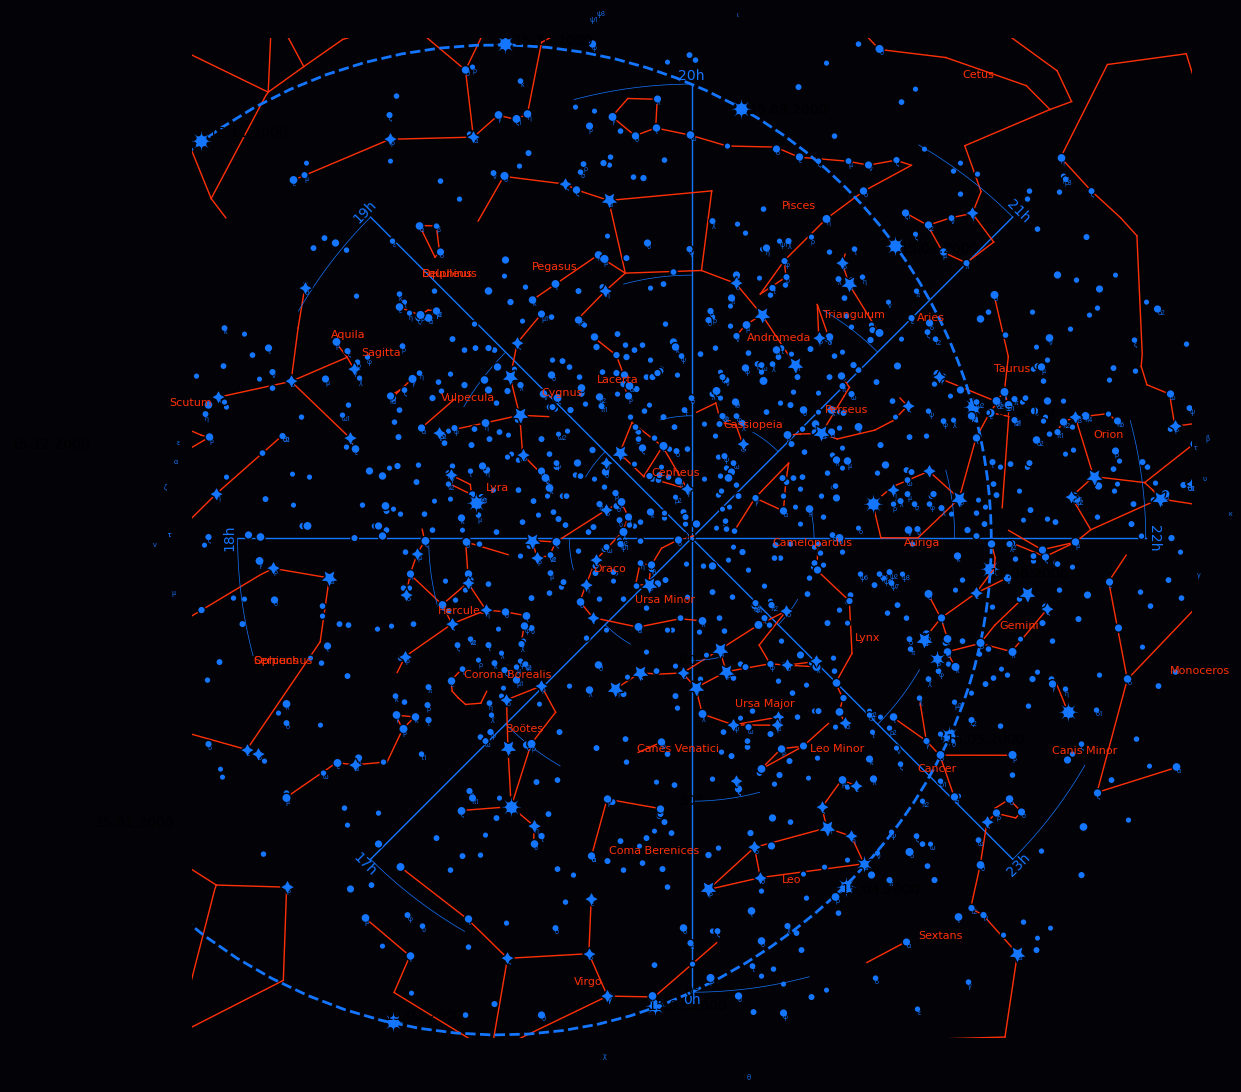

In [24]:
# try to plot a grid

import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt 
from scipy.interpolate import BSpline, make_interp_spline

fig = plt.figure(figsize=figsize, facecolor=Colors.SPACE.value)
ax = plt.axes(projection=ccrs.Stereographic(90))

# Datapoints Ecliptic

# see https://www.geeksforgeeks.org/how-to-plot-a-smooth-curve-in-matplotlib/

#RA = np.array([0,90,180,270,360])
#DEC = np.array([0,23,0,-23,0])

#RA = np.array([0,90,180,206.5,237.5,270, 304, 360])
#DEC = np.array([0,23,0,-11,-20.1,-23,-19.7,0])

# todo: replace with sun positions!
RA = np.array([0,45,90,135, 180, 225, 270, 315, 360])
DEC = np.array([0,17,23.3,17,0,-17,-23.3,-17,0])


RA_ = np.linspace(RA.min(), RA.max(), 100)
DEC_ = sp.interpolate.interp1d(RA, DEC, kind="cubic")(RA_)

# when smoothing the eciptic it becomes wonky...
# -> now it works!

plt.plot(RA_, DEC_, transform=ccrs.Geodetic(), lw = 1, linestyle='dashed', color = Colors.C2.value)

# plot sun positions
for index, row in sun_positions.iterrows():
    # *(-1)-180 flips the data
    ra = row['ra']
    dec = row['dec']

    #plt.plot (ra, dec, transform=ccrs.Geodetic(), color=get_star_color(-1), marker=get_star_marker(-1), markersize=get_star_size(-1))

    ax.scatter(ra, dec, transform=ccrs.Geodetic(), s = get_star_size(-1), marker = get_star_marker(-1), color=get_star_color(-1), lw=1, edgecolor=Colors.SPACE.value, zorder=0)
    ax.scatter(ra, dec, transform=ccrs.Geodetic(), s = get_star_size(-1), marker = get_star_marker(-1), color=get_star_color(-1), lw=0, zorder=0)


    plt.text (ra - 1, dec, str(row['date']), transform=ccrs.Geodetic(), horizontalalignment='left', va='center')


# plot gridlines



i = 0
RA_lable = 24
while i < 360:
    ax.plot([i, 0], [0, 90], transform=ccrs.Geodetic(), lw=1, alpha=1, color=Colors.C2.value, zorder=0.01)

    lable_rotation = 180 + i
    if lable_rotation < 270 or lable_rotation > 450:
        lable_rotation = i

    if RA_lable == 24:
        plt.text(i, 0 - 1, str(0) + "h", transform=ccrs.Geodetic(), horizontalalignment='center', va='center', rotation = lable_rotation, color=Colors.C2.value)
    else:
        plt.text(i, 0 - 1, str(RA_lable) + "h", transform=ccrs.Geodetic(), horizontalalignment='center', va='center', rotation=lable_rotation, color=Colors.C2.value)
    RA_lable -= 1
    
    j = 0
    while j <= 90:

        if i == 0:
            plt.text(0, j, str(j) + "°", transform=ccrs.Geodetic(), horizontalalignment='center', va='center')
        
        RA_grid = np.array([i, i + 15, i + 30, i + 45]) # at least 4 points are needed for cubic interpolation...
        DEC_grid = np.array([j, j, j, j])

        RA_grid_DEC_grid_Spline = make_interp_spline(RA_grid, DEC_grid)
        
        RA_grid_ = np.linspace(RA_grid.min(), RA_grid.max(), 50)
        DEC_grid_ = RA_grid_DEC_grid_Spline(RA_grid_)
        
        ax.plot(RA_grid_, DEC_grid_, transform=ccrs.Geodetic(), lw=1, alpha=1, color=Colors.C2.value)
        j += 30
    i += 45



# plot constellations

for index, row in asterisms.iterrows():
    # *(-1)-180 flips the data
    ras = [float(x)*360/24*(-1)-180 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = Colors.C1.value # todo - here we can differentiate between zidiac signs
    if row['zodiac'] == True: 
        color = Colors.C1.value
    assert len(asterisms)%2 == 0
    for n in range(int(len(asterisms)/2)):
        ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], transform=ccrs.Geodetic(), color=color, lw=1, zorder=0.1)

# plot constellation limits

'''

for index, row in constellations.iterrows():
    ras = [float(x)*360/24 for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [float(x) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    ax.plot(ras, decs, transform=ccrs.Geodetic(), lw=0.5, alpha=1, color=Colors.LIMITS.value)

'''

# plot constellation names

for index, row in const_names.iterrows():
    if row['dec'] >= -10: # todo we can simply this earilier
        ax.text(row['ra']*360/24*(-1)-180, row['dec'], row['name'], 
                transform=ccrs.Geodetic(), ha='left', va='top', fontsize=8, color=Colors.C1.value)

# plot nonvariable stars

stars_northern_nonvar = stars_northern[pd.isnull(stars_northern['var'])]
stars_northern_nonvar = stars_northern_nonvar[stars_northern_nonvar['color'] != '#000000'] #what does this line do?

bayers = stars_northern_nonvar[pd.notnull(stars_northern_nonvar['bayer'])] #bayer stars
print(len(bayers), 'labeled stars to plot')

stars_northern_nonvar = stars_northern_nonvar[pd.isnull(stars_northern_nonvar['bayer'])]

# plot bayer stars in red

for index, row in bayers.iterrows(): 
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=Colors.SPACE.value, lw=2, edgecolor=Colors.SPACE.value, zorder=6.5-row['mag'])
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=get_star_color(row['mag']), lw=0, zorder=6.5-row['mag'])

# plot bayers designation

for index, row in bayers.iterrows(): 
    ax.text(row['ra']*360/24*(-1)-180, row['dec'], row['greek_letters'], transform=ccrs.Geodetic(), 
            ha='left', va='top', fontsize=5, color=Colors.C2.value, fontproperties=prop_seguisym, zorder=100)

#plot other nonvariable stars in yellow

for index, row in stars_northern_nonvar.iterrows(): 
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=Colors.SPACE.value, lw=2, edgecolor=Colors.SPACE.value, zorder=6.5-row['mag'])
    ax.scatter(row['ra']*360/24*(-1)-180, row['dec'], transform=ccrs.Geodetic(), s = get_star_size(row["mag"]), marker = get_star_marker(row['mag']), color=get_star_color(row['mag']), lw=0, zorder=6.5-row['mag'])

ax.set_xlim(ax.get_xlim()[::-1])

# ax.gridlines()

set_save_image(fig, './figures/equator.pdf')

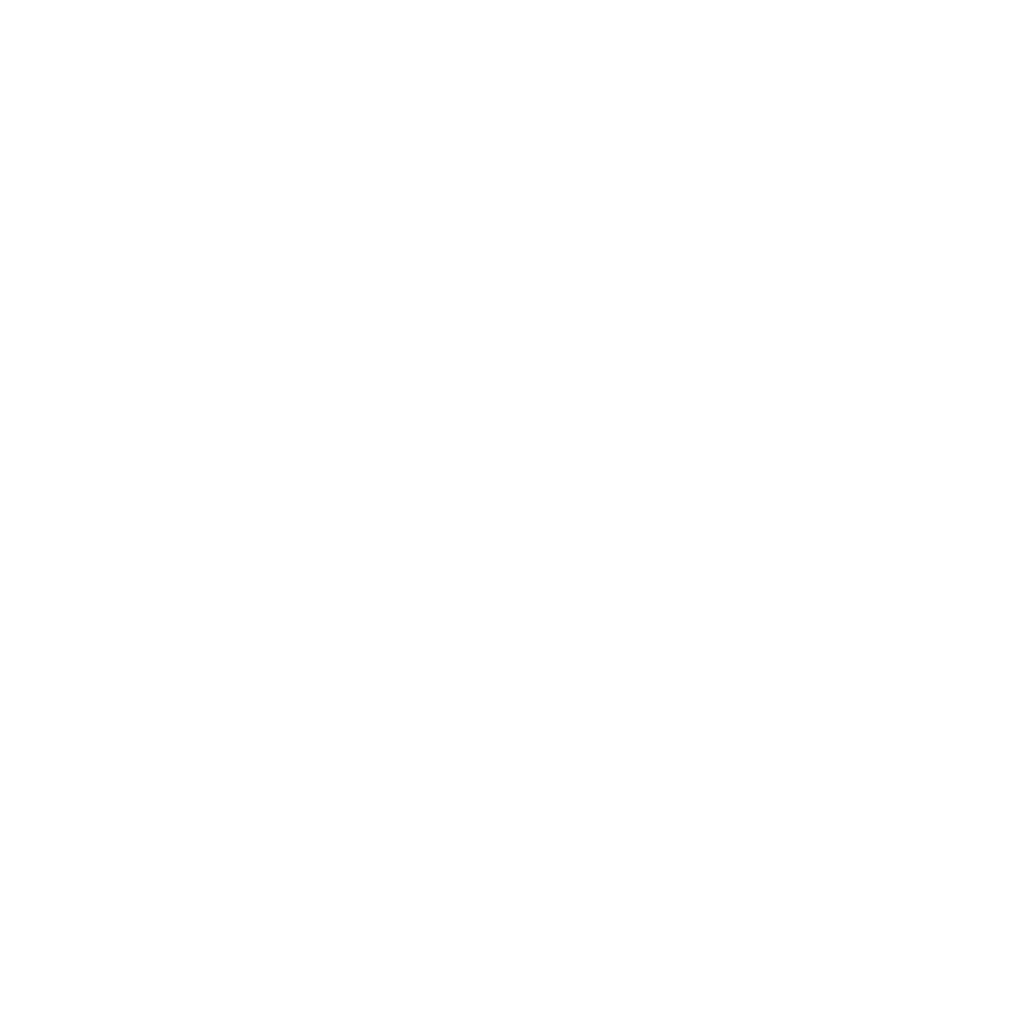

In [11]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))




    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/greek_letters.pdf')

126 labeled stars to plot


C:\Users\ffwin\AppData\Local\Temp\ipykernel_28120\1537968575.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


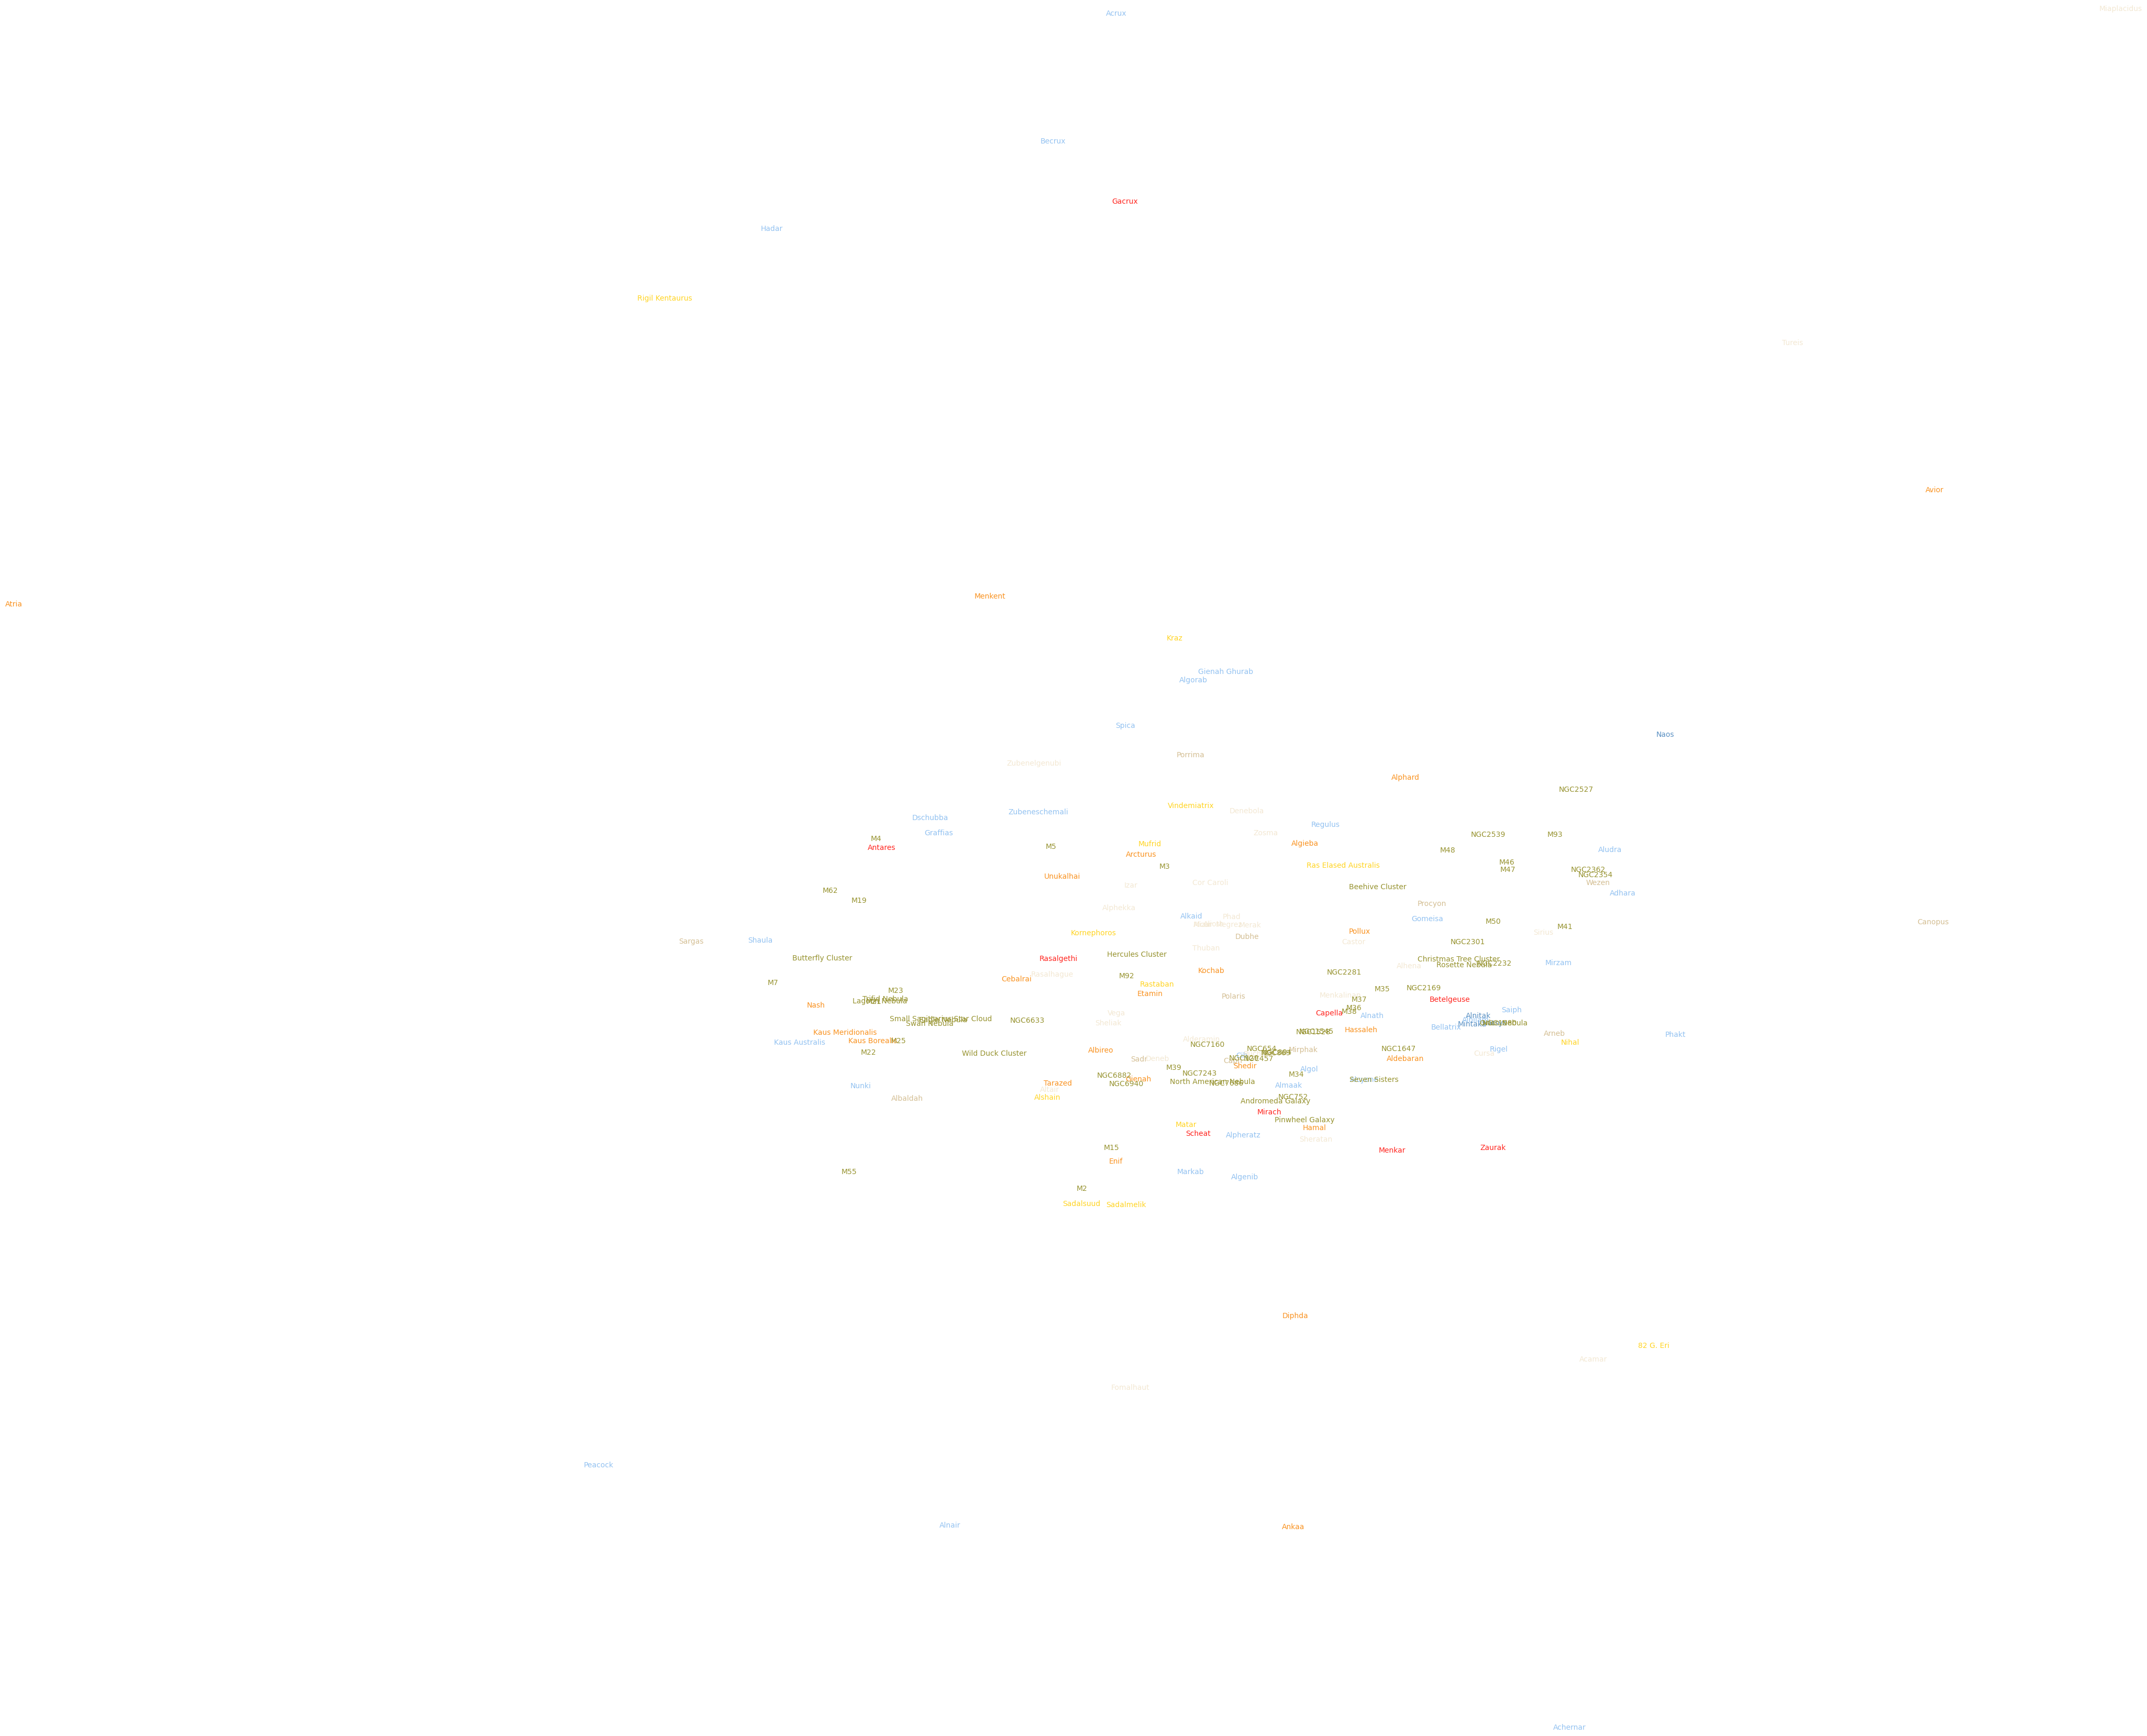

In [12]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

names = stars[pd.notnull(stars['proper'])]
print(len(names), 'labeled stars to plot')

for index, row in names.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['proper'], color=row['linecolor'],
            ha='left', va='center', transform=ccrs.Geodetic())
    
for index, row in messiers.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], row['name_2'], color=other_color,
            ha='left', va='center', transform=ccrs.Geodetic())
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/names.pdf')

2306 non-variable stars to plot


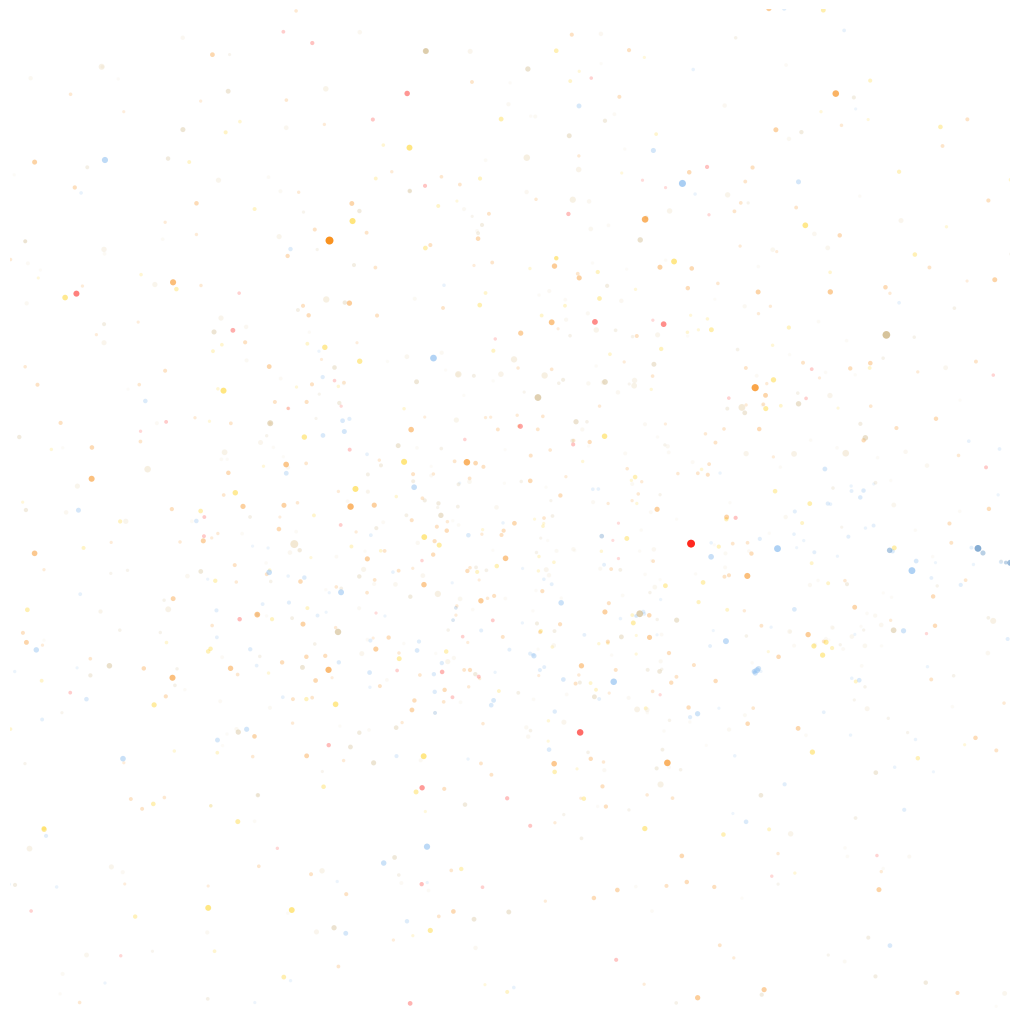

In [13]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

stars_nonvar = stars[pd.isnull(stars['var'])]
stars_nonvar = stars_nonvar[stars_nonvar['color'] != '#000000']
print(len(stars_nonvar), 'non-variable stars to plot')

for index, row in stars_nonvar.iterrows(): 
    try:
        ax.scatter(row['ra']*360/24, row['dec'], transform=ccrs.Geodetic(),
           s=(6.5-row['mag'])*5, color=row['color'], lw=0, edgecolor='none', 
           alpha=min(1, ((6.5-row['mag'])*5)/(6.5*5)), zorder=6.5-row['mag'])
    except:
        print(row['ra'], row['dec'], row['mag'], row['color'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/star_fills.png')

2307 non-variable stars to plot


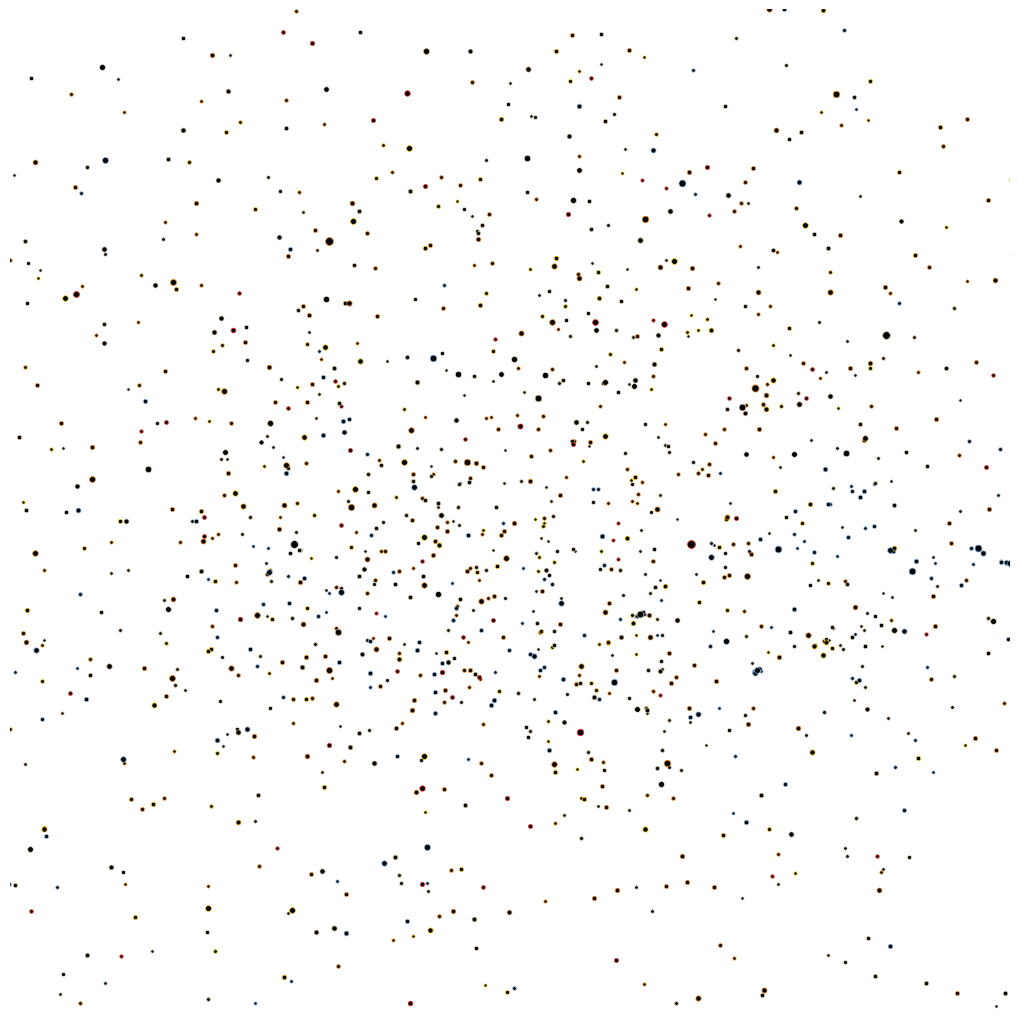

In [14]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

stars_nonvar = stars[pd.isnull(stars['var'])]
print(len(stars_nonvar), 'non-variable stars to plot')

for index, row in stars_nonvar.iterrows(): 
    try:
        ax.scatter(row['ra']*360/24, row['dec'], transform=ccrs.Geodetic(), alpha=1,
           s=(6.5-row['mag'])*5, edgecolor=row['color'], lw=0.5, color='k', zorder=6.5-row['mag'])
    except:
        print(row['ra'], row['dec'], row['mag'], row['color'])
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/star_lines.png')

In [15]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))
# ax.set_global()
#ax.background_patch.set_fill(False)

stars_var = stars[pd.notnull(stars['var'])]
print(len(stars_var), 'variable stars to overplot')

for index, row in stars_var.iterrows(): 
    ax.text(row['ra']*360/24, row['dec'], u"\u16BC", transform=ccrs.Geodetic(),
            fontproperties=prop_seguihis, fontsize=(12-row['mag']), 
            alpha=max(0.1, min(1,((6.5-row['mag'])*5)/(6.5*5))), color=row['color'], ha='center', va='center')
    
ax.set_xlim(ax.get_xlim()[::-1])
ax.axis('off')
set_save_image(fig, './figures/variable_stars.png')

526 variable stars to overplot


C:\Users\ffwin\AppData\Local\Temp\ipykernel_28120\1537968575.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


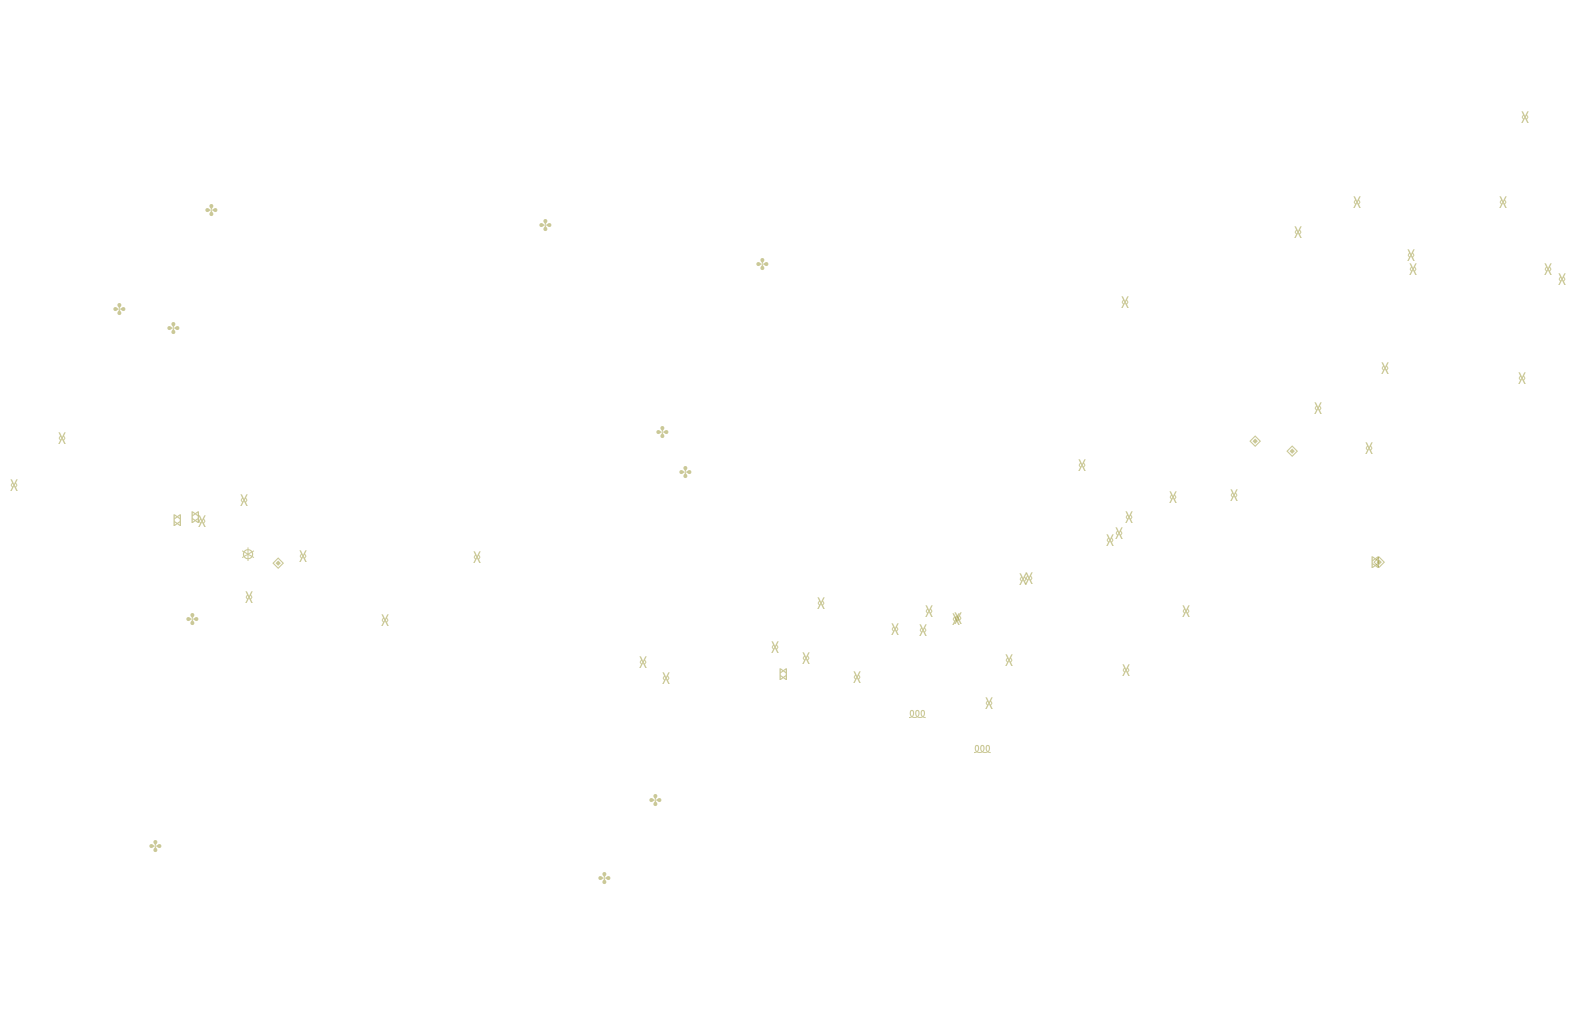

In [16]:
fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))

for index, row in messiers.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(row['ra']*360/24, row['dec'], row['code'], transform=ccrs.Geodetic(), alpha=0.5,
          fontsize=12, color=other_color, ha='center', va='center', fontproperties=fontprop)
    
ax.set_xlim(ax.get_xlim()[::-1])
set_save_image(fig, './figures/messier_ngcs.png')

AttributeError: 'Axes' object has no attribute 'set_global'

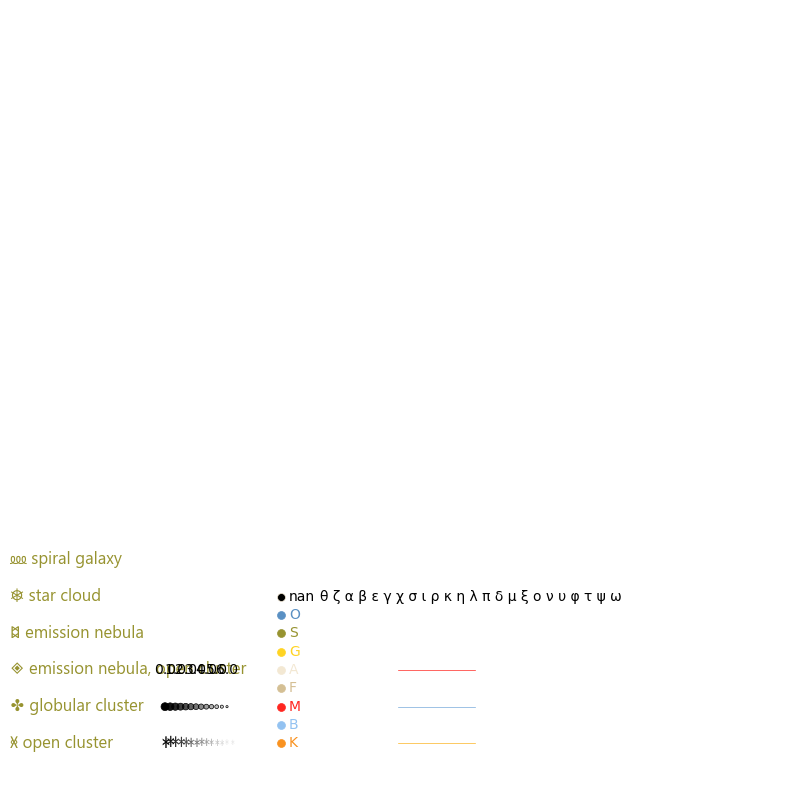

In [17]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

# Key for non-star object codes
codes = messiers.drop_duplicates(subset='type', keep='first')
codes.reset_index(inplace=True)
for index, row in codes.iterrows(): 
    if row['code'] in [u"\u16b8", u"\u16e5", u"\u16BC", u"\u16bb"]:
        fontprop = prop_seguihis
    else: 
        fontprop = prop_seguisym
    ax.text(0, index, row['code']+" "+row['type'], alpha=1, fontsize=12, 
            color=other_color, ha='left', va='center', fontproperties=fontprop)
    
# Keys for star sizes
mags = np.arange(0, 6.55, 0.5)
for index, mag in enumerate(mags): 
    # Numbers
    if index % 2 == 0:
        ax.text(2+index/15, 2, mag, ha='center', va='center')
    
    # Key for variable star sizes
    ax.text(2+index/15, 0, u"\u16BC", fontproperties=prop_seguihis, fontsize=(12-mag), 
            alpha=max(0.1, min(1,((6.5-mag)*5)/(6.5*5))), color='k', ha='center', va='center')

    # Key for normal star sizes
    ax.scatter(2+index/15, 1, s=(6.5-mag)*5, color='k', lw=0, edgecolor='none', 
               alpha=min(1, ((6.5-mag)*5)/(6.5*5)))
    ax.scatter(2+index/15, 1, alpha=1, s=(6.5-mag)*5, edgecolor='k', lw=0.5, facecolor='none')

# Key for colors
cols = stars.drop_duplicates(subset='color', keep='first')
cols.reset_index(inplace=True)
for index, row in cols.iterrows(): 
    ax.scatter(3.5, index/2, s=6.5*5, lw=0.5, 
               edgecolor=row['linecolor'], color=row['color'])
    ax.text(3.6, index/2, row['spect_desig'], ha='left', va='center', color=row['color'])

# Key to zodiac colors
ax.plot([5, 6], [0, 0], color=zodiac_color, lw=0.5)
ax.plot([5, 6], [1, 1], color=nonzodiac_color, lw=0.5)
ax.plot([5, 6], [2, 2], color=const_color, lw=0.5)

# Key for colors
cols = stars.drop_duplicates(subset='greek_letters', keep='first')
cols.reset_index(inplace=True)
letterlist = cols['greek_letters'].tolist()
letterlist = [x for x in letterlist if len(str(x)) == 1]
letterlist = " ".join(letterlist)
ax.text(4, 4, letterlist, ha='left', va='center', color=row['color'])

ax.set_xlim(0, 10)
ax.set_ylim(-1, 20)
set_save_image(fig, './figures/key.pdf')

In [ ]:
savename = './figures/gridlines.png'

fig = plt.figure(figsize=figsize)
ax = plt.axes(projection=ccrs.Stereographic(90))
# ax.set_global()
#ax.background_patch.set_fill(False)

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_delim = np.arange(-90, 90.01, 0.1)
lon_delim = np.arange(-180, 180.01, 0.1)

for lg in lat_large: 
    ax.plot(lon_delim, [lg]*len(lon_delim), transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot(lon_delim, [sm]*len(lon_delim), transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)
for lg in lon_large: 
    ax.plot([lg]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
            color='k', lw=0.25, alpha=0.25, clip_on=False)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*len(lat_delim), lat_delim, transform=ccrs.PlateCarree(), 
                color='k', lw=0.125, alpha=0.25, clip_on=False)

set_save_image(fig, savename)

C:\Users\ffwin\AppData\Local\Temp\ipykernel_28712\1537968575.py:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 281059328x281059328 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 1 Axes>

In [ ]:
savename = './figures/gridlines_labels.pdf'

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
shift = 20.242874009/20
shift_y = 360*(shift/2)-180
shift_x = 180*(shift/2)-90

lon_large = np.arange(-180, 181, 1*360/24)
lon_small = np.arange(-180, 181, 0.5*360/24)
lon_mini = np.arange(-180, 181, 0.1*360/24)
lat_large = np.arange(-90, 91, 10)
lat_small = np.arange(-90, 91, 5)
lat_mini = np.arange(-90, 91, 1)

for lg in lat_large: 
    ax.plot([-180-shift_x, -180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(-180-shift_x, lg, str(lg)+"°", rotation=-90,
            color='k', alpha=0.35, ha='right', va='top', clip_on=False, fontsize=2)
    ax.plot([180+shift_x, 180], [lg]*2, color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(180+shift_x, lg, str(lg)+"°", rotation=90,
            color='k', alpha=0.35, ha='left', va='top', clip_on=False, fontsize=2)
for sm in lat_small: 
    if sm not in lat_large: 
        ax.plot([-180-shift_x*0.5, -180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.5, 180], [sm]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lat_mini: 
    if (m not in lat_large) and (m not in lat_small): 
        ax.plot([-180-shift_x*0.25, -180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([180+shift_x*0.25, 180], [m]*2, color='k', lw=0.25, alpha=0.25, clip_on=False)
for i, lg in enumerate(lon_large): 
    hr = int(24 - i)
    ax.plot([lg]*2, [-90-shift_y*0.5, -90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, -90-shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
    ax.plot([lg]*2, [90+shift_y*0.5, 90], color='k', lw=0.5, alpha=0.35, clip_on=False)
    ax.text(lg, 90+shift_y*0.5, str(hr)+"HR", color='k', alpha=0.35, 
            ha='left', va='bottom', clip_on=False, fontsize=2)
for sm in lon_small: 
    if sm not in lon_large: 
        ax.plot([sm]*2, [-90-shift_y*0.5, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([sm]*2, [90+shift_y*0.5, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)
for m in lon_mini: 
    if (m not in lon_large) and (m not in lon_small): 
        ax.plot([m]*2, [-90-shift_y*0.25, -90], color='k', lw=0.25, alpha=0.25, clip_on=False)
        ax.plot([m]*2, [90+shift_y*0.25, 90], color='k', lw=0.25, alpha=0.25, clip_on=False)

set_save_image(fig, savename)